In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
import kwcoco
from pathlib import Path
from ultralytics.yolo.engine.results import Results

import utils


### COCO形式のデータセットをYOLO用に変換

In [2]:
coco = kwcoco.CocoDataset("./dataset/sample_dataset/sample_coco_segmentation_dataset/sentan_dataset.json")

config_yaml = utils.coco2yolo(
                            output_dir = "./dataset/sample_dataset/sample_yolo_segmentation_dataset/",
                            train      = coco,
                            task       = "segmentation",
                            exist_ok   = True
                            )

print(config_yaml)

coco2yolo:train: 100%|██████████| 9/9 [00:00<00:00, 19.62it/s]

dataset/sample_dataset/sample_yolo_segmentation_dataset/config.yaml


### 作成したデータセットを確認

データセットの枚数：9 枚
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960)


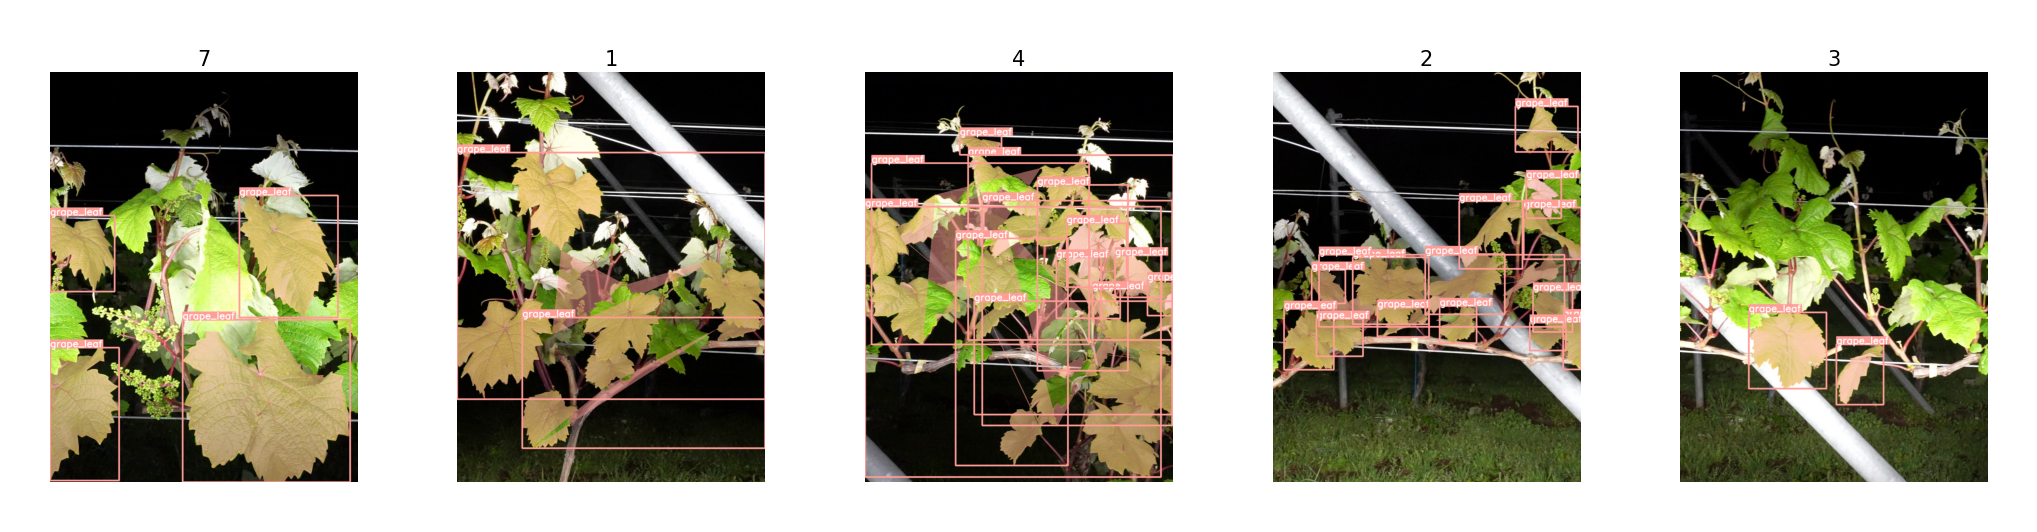

In [8]:
yolo_data_train = utils.YOLO_dataset(str(config_yaml), "train")

print(f"データセットの枚数：{len(yolo_data_train)} 枚")

imgs = {}
for i in random.sample(range(len(yolo_data_train)), 5):
    yolo_data = yolo_data_train[i]

    res = Results(
        orig_img  = yolo_data["orig_img"],
        path      = yolo_data["img_path"],
        names     = yolo_data_train.class_name,
        boxes     = yolo_data["bboxes"],
        masks     = yolo_data["masks"],
        keypoints = yolo_data["keypoints"],
    )

    imgs[i] = res.plot()[:, :, ::-1]

utils.show_imgs(imgs, ncol=5, dpi=500)